In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [217]:
color = lambda X: ['red' if x == 1 else 'blue' for x in X]

# Definitions & Equations

**Hyperplane:** A hyperplane is defined the set of points that satisfy: 

$$\tag{1} \mathbf{w}^T\cdot\mathbf{x} = 0.$$ 

If we let $\mathbf{w} = (-b, -a, 1)^T$, and $\mathbf{x} = (1, x, y)^T$, then we can see that:

$$ \mathbf{w}^T\cdot\mathbf{x} = 0 \\ (-b, -a, 1)^T \cdot (1, x, y) = 0 \\ -b + (-ax) + y = 0 \\ y - ax - b = 0 \\ y = ax + b,$$

which is indeed the equation of a line, in point-slope form. Note that $\mathbf{w}$ is always normal to the hyperplane.

**Distance from a point $P$ to the hyperplane:** If we have a point $P(x,y)$, let $\mathbf{a}$ be the vector from the origin to $P$, and let $\mathbf{u}$ be the direction of $\mathbf{w}$, then the distance from $P$ to the hyperplane is the same as the norm of the orthogonal projection of $\mathbf{a}$ onto $\mathbf{w}$:

$$ \tag{2} \| \mathbf{p} \| = \| (\mathbf{u}\cdot\mathbf{a})\mathbf{u} \|. $$

**Margin of the hyperplane:** The margin of the hyperplane is like the 'street-width'. If we have the closest point to the hyperplane, then the margin is:

$$ \tag{3} \mathrm{margin} = 2\| \mathbf{p}\|. $$

# Example (assuming $w_0=0$)

In [229]:
get_y = lambda x, w: (-w[1]/w[2]) * x - w[0] / w[2] # Eq 1

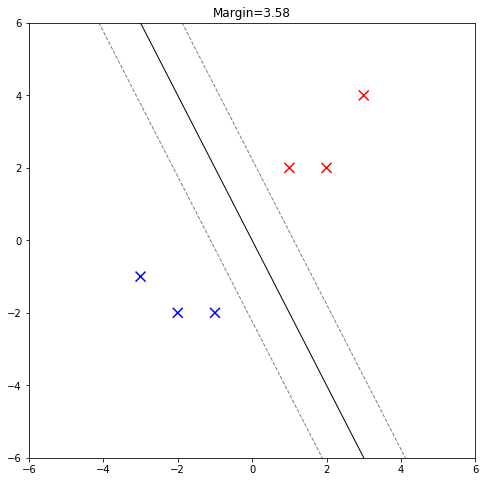

In [230]:
#data
X = np.array([(2,2), (3,4), (1,2), (-1, -2), (-3, -1), (-2, -2)])
X_augmented = np.c_[np.ones(X.shape[0]), X]
y = np.array([1, 1, 1, -1, -1, -1])
w = np.array([0, 2, 1])

# plotting
lim = 6
hx = np.array([-lim, lim])
hy = get_y(hx, w)
plt.figure(figsize=(8,8))
plt.xlim([-lim, lim])
plt.ylim([-lim, lim])
plt.scatter(X[:,0], X[:,1], c=color(y), marker='x', s=100)
plt.plot(hx, hy, c='black', lw=1)

# calculate the distance to the hyperplane for the closest point
u = w / norm(w) # w as unit vector
pnorm = min([norm(dot(x, u)*u) for x in X_augmented]) # Eq 2 (closest point)
margin = 2 * pnorm # Eq (3)

# plot margin
my0 = (-w[1])*hx + (-w[0]+norm(p))
my1 = (-w[1])*hx + (-w[0]-norm(p))

plt.plot(hx, my0, ls='dashed', lw=1, c='gray')
plt.plot(hx, my1, ls='dashed', lw=1, c='gray')
plt.title('Margin={}'.format(round(margin, 2)));

The result is not entirely correct because in the calculations we assumed that $w_0=-b=0$.